# 1. Symbol solutions to the Dubin's curves

This is a Jupyter notebook describing a symbolic (and primarily geometric) derivation of the optimal curves for the Dubin's curve. 

# 2. Definitions and Derivations

A configuration $q$ of the Dubin's car is $[x, y, \theta]^T$ where $(x, y)$ is a position and $\theta$ is the angle. 

Dubin's paper showed that the shortest path between a pair of configurations $q_i$ and $q_e$ can be solved by a combination a series of bang-bang inputs.  

This means that for each combination of possible optimal words, the shortest path problem can be reduced to solving three non-linear equations (for the length of the each of the arcs).  The final shortest path can then be selected from those words with meaningful results.

Because Dubin's curves are invariant to rotation and translation, it's possible to simplify the solution of these equations by removing redundant information. This is done by:

1. Translating the configurations s.t. q_i is at the origin
2. Rotating both configurations s.t. the y- co-ordinate of q_e is 0

The result of this is that there are now very obviously only three parameters:

- the angle $\alpha$ of the $q_i$ to the x- axis;
- the angle $\beta$ of $q_e$ to the x-axis; and 
- $d$ the distance between configurations.

In [1]:
import sympy
sympy.init_printing()
from sympy import Mod, sin, cos, pi, sqrt, atan2, Abs

In [2]:
# The symbols used for solving the equations
a, b = sympy.symbols('alpha beta', real=True)
d = sympy.symbols('d', real=True, positive=True)

# 2.1 Equations of Motion

The following functions are the optimal Bang-Bang Primitives for the Dubins car. 

Note that by design, this code is written for clarity with the intention that algebraic results will be produced (ie/ this code is designed to produce symbolic results rather than numeric ones)

In [3]:
def circ_L(x, y, theta):
    return (x-sin(theta), y+cos(theta))

def circ_R(x, y, theta):
    return (x+sin(theta), y-cos(theta))

def fwd_L(x, y, theta, t):
    # (x_c, y_c) is the centre of turn
    x_c, y_c = circ_L(theta)
    
    # t_n is the angle the vehicle will reach
    t_n = theta + t
    
    # (x_n, y_n) is the final vehicle position
    x_n = x_c + sin(t_n) 
    y_n = y_c - cos(t_n)    
    return x_n, y_n, t_n

def fwd_R(x, y, theta, t):
    # (x_c, y_c) is the centre of turn
    x_c, y_c = circ_R(theta)
    
    # t_n is the angle the vehicle will reach
    t_n = theta - t
    
    # (x_n, y_n) is the final vehicle position
    x_n = x_c - sin(t_n)
    y_n = y_c + cos(t_n)    
    return x_n, y_n, t_n

def fwd_S(x, y, theta, t):
    x_n = x + sin(theta) * t
    y_n = y + cos(theta) * t
    t_n = theta
    return x_n, y_n, t_n

# 3. Solutions

The diagrams in this section are illustrative only they are not intended to show shortest paths

## 3.1 LSL

Assuming a Left-Straight-Left sequence. The length of the straight section must be the distance between the centre of turns between the configurations. This is a purely geometric argument.

In the following diagram, the red dot indicates the initial configuration, and the blue line marks the straight segment. Also marked are the turning circles of the vehicle and the line between the turning centres

<img src="files/LSL.svg">

### 3.1.1 Straight Segment

The LSL segment can only exist when the length of the straight segment is greater than or equal to 0.

In [4]:
# Circle center q_i 
cx1, cy1 = circ_L(0, 0, a)
cx1

In [5]:
# Circle center q_e
cx2, cy2 = circ_L(d, 0, b)
cx2

In [6]:
dx = cx2-cx1
dx**2

In [7]:
dy = cy2-cy1
dy**2

In [8]:
p_sq = dx**2+dy**2
sympy.simplify(p_sq)

### 3.1.2 Left Segment 1 and 2

The arcs are determined by a combination of the angle that the straight segment is at and the $\alpha$ and $\beta$ parameters. Because angles are 

In [9]:
phi = atan2(dy, dx)
phi

In [10]:
t = Mod(phi - a, 2*pi)
t

(-α + atan2(-cos(α) + cos(β), d + sin(α) - sin(β))) mod 2⋅π

In [11]:
q = Mod(b - phi, 2*pi)
q

(β - atan2(-cos(α) + cos(β), d + sin(α) - sin(β))) mod 2⋅π

In [12]:
p_sq

In [13]:
LSL_succ = sympy.Matrix([t,sqrt(p_sq),q])
LSL_constraint = p_sq > 0
LSL_Symbols = (LSL_succ, LSL_constraint)
LSL_Symbols

⎛⎡(-α + atan2(-cos(α) + cos(β), d + sin(α) - sin(β))) mod 2⋅π⎤                
⎜⎢                                                           ⎥                
⎜⎢        ______________________________________________     ⎥                
⎜⎢       ╱                   2                        2      ⎥, (-cos(α) + cos
⎜⎢     ╲╱  (-cos(α) + cos(β))  + (d + sin(α) - sin(β))       ⎥                
⎜⎢                                                           ⎥                
⎝⎣(β - atan2(-cos(α) + cos(β), d + sin(α) - sin(β))) mod 2⋅π ⎦                

                                  ⎞
                                  ⎟
    2                        2    ⎟
(β))  + (d + sin(α) - sin(β))  > 0⎟
                                  ⎟
                                  ⎟
                                  ⎠

## 3.2 RSR

The case for RSR is the symmetry of the LSL case, and the reasoning follows in the same way

<img src="files/RSR.svg">

In [14]:
cx1, cy1 = circ_R(0, 0, a)
cx2, cy2 = circ_R(d, 0, b)
dx = cx2-cx1
dy = cy2-cy1
p_sq = dx**2+dy**2
p_sq = sympy.simplify(p_sq)
p_sq

In [15]:
phi = atan2(dy, dx)
t = Mod(phi - a, 2*pi)
q = Mod(b - phi, 2*pi)

In [16]:
RSR_succ = sympy.Matrix([t,sqrt(p_sq),q])
RSR_constraint = p_sq > 0
RSR_Symbols = (RSR_succ, RSR_constraint)
RSR_Symbols

⎛⎡(-α + atan2(cos(α) - cos(β), d - sin(α) + sin(β))) mod 2⋅π⎤                 
⎜⎢                                                          ⎥                 
⎜⎢      _________________________________________________   ⎥   2             
⎜⎢     ╱  2                                                 ⎥, d  - 2⋅d⋅sin(α)
⎜⎢   ╲╱  d  - 2⋅d⋅sin(α) + 2⋅d⋅sin(β) - 2⋅cos(α - β) + 2    ⎥                 
⎜⎢                                                          ⎥                 
⎝⎣(β - atan2(cos(α) - cos(β), d - sin(α) + sin(β))) mod 2⋅π ⎦                 

                                    ⎞
                                    ⎟
                                    ⎟
 + 2⋅d⋅sin(β) - 2⋅cos(α - β) + 2 > 0⎟
                                    ⎟
                                    ⎟
                                    ⎠

## 3.3 LSR

The difference for the case where the direction changes is that the straight section will path through the centre of the line between appropriate turning circles.  Thinking about it in a slightly different way, you've now formed a right angle triangle, where the hypotenuse is the distance between turning circles, and one side is length 2 (two radii).

The straight segment angle can be inferred using an atan2, similarly, the angle between the straight segment and the tangent line is $atan_2(2, p)$

In the diagram, the straight segment is shown in blue, along with green construction lines that highlight how the tangent is used

<img src="files/LSR.svg">

In [17]:
cx1, cy1 = circ_L(0, 0, a)
cx2, cy2 = circ_R(d, 0, b)
dx = cx2-cx1
dy = cy2-cy1
p_sq = (dx**2+dy**2) - 2**2
sympy.simplify(p_sq)

In [18]:
phi = atan2(dy, dx)
phi

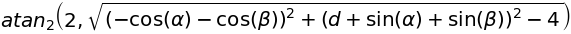

In [19]:
sigma = atan2(2, sqrt(p_sq))
sigma

In [20]:
t = Mod(a - phi + sigma, 2*pi)
t

⎛         ⎛      __________________________________________________⎞          
⎜         ⎜     ╱                   2                        2     ⎟          
⎝α + atan2⎝2, ╲╱  (-cos(α) - cos(β))  + (d + sin(α) + sin(β))  - 4 ⎠ - atan2(-

                                     ⎞        
                                     ⎟        
cos(α) - cos(β), d + sin(α) + sin(β))⎠ mod 2⋅π

In [21]:
q = Mod(phi -sigma -b, 2*pi)
q

⎛          ⎛      __________________________________________________⎞         
⎜          ⎜     ╱                   2                        2     ⎟         
⎝-β - atan2⎝2, ╲╱  (-cos(α) - cos(β))  + (d + sin(α) + sin(β))  - 4 ⎠ + atan2(

                                      ⎞        
                                      ⎟        
-cos(α) - cos(β), d + sin(α) + sin(β))⎠ mod 2⋅π

In [22]:
LSR_succ = sympy.Matrix([t,sqrt(p_sq),q])
LSR_constraint = p_sq > 0
LSR_Symbols = (LSR_succ, LSR_constraint)
LSR_Symbols

⎛⎡⎛         ⎛      __________________________________________________⎞        
⎜⎢⎜         ⎜     ╱                   2                        2     ⎟        
⎜⎢⎝α + atan2⎝2, ╲╱  (-cos(α) - cos(β))  + (d + sin(α) + sin(β))  - 4 ⎠ - atan2
⎜⎢                                                                            
⎜⎢                                       _____________________________________
⎜⎢                                      ╱                   2                 
⎜⎢                                    ╲╱  (-cos(α) - cos(β))  + (d + sin(α) + 
⎜⎢                                                                            
⎜⎢⎛          ⎛      __________________________________________________⎞       
⎜⎢⎜          ⎜     ╱                   2                        2     ⎟       
⎝⎣⎝-β - atan2⎝2, ╲╱  (-cos(α) - cos(β))  + (d + sin(α) + sin(β))  - 4 ⎠ + atan

                                       ⎞         ⎤                            
                                       ⎟         ⎥ 

## 3.4 RSL

Symmetry case for LSR

<img src="files/RSL.svg">

In [23]:
cx1, cy1 = circ_R(0, 0, a)
cx2, cy2 = circ_L(d, 0, b)
dx = cx2-cx1
dy = cy2-cy1
p_sq = (dx**2+dy**2) - 2**2

In [24]:
phi = atan2(dy, dx)
sigma = atan2(2, sqrt(p_sq))
t = Mod(a - phi + sigma, 2*pi)
q = Mod(phi -sigma -b, 2*pi)

In [26]:
RSL_succ = sympy.Matrix([t,sqrt(p_sq),q])
RSL_constraint = p_sq > 0
RSL_Symbols = (RSL_succ, RSL_constraint)
RSL_Symbols

⎛⎡⎛         ⎛      _________________________________________________⎞         
⎜⎢⎜         ⎜     ╱                  2                        2     ⎟         
⎜⎢⎝α + atan2⎝2, ╲╱  (cos(α) + cos(β))  + (d - sin(α) - sin(β))  - 4 ⎠ - atan2(
⎜⎢                                                                            
⎜⎢                                      ______________________________________
⎜⎢                                     ╱                  2                   
⎜⎢                                   ╲╱  (cos(α) + cos(β))  + (d - sin(α) - si
⎜⎢                                                                            
⎜⎢⎛          ⎛      _________________________________________________⎞        
⎜⎢⎜          ⎜     ╱                  2                        2     ⎟        
⎝⎣⎝-β - atan2⎝2, ╲╱  (cos(α) + cos(β))  + (d - sin(α) - sin(β))  - 4 ⎠ + atan2

                                     ⎞         ⎤                              
                                     ⎟         ⎥   

## 3.5 RLR

With three turning circles (of equal radius) that kiss (share a common tangent), we know

- the distance between the turning circles
- that the distance between centre1 and centre2 is 2
- that the distance between centre2 and centre3 is 2

Using the distance between the turning circle centres and by the [law of cosines](https://en.wikipedia.org/wiki/Law_of_cosines) it's possible to calculate the arc length of the middle section. 

By inspection, no solution if the turning circles of are > 2 radii apart

<img src="files/RLR.svg">

In [27]:
cx1, cy1 = circ_R(0, 0, a)
cx2, cy2 = circ_R(d, 0, b)
dx = cx2-cx1
dy = cy2-cy1
cdist = dx**2+dy**2

In [28]:
e = 1-(cdist)/8
e

In [29]:
phi = atan2(dy, dx)
phi

In [30]:
p = Mod(e, 2*pi)
t = Mod(-a - phi + p/2, 2*pi)
q = Mod(Mod(b, 2*pi) - a - t + p, 2*pi)

In [40]:
RLR_succ = sympy.Matrix([t, p, q])
RLR_constraint = Abs(e) <= 1
RLR_Symbols = (RLR_succ, RLR_constraint)
sympy.cse(RLR_Symbols)

⎛⎡                                                             ⎛        2     
⎜⎢                                                             ⎜      x₁    x₂
⎜⎢(x₀, -α), (x₁, -cos(α) + cos(β)), (x₂, d + sin(α) - sin(β)), ⎜x₃, - ─── - ──
⎜⎣                                                             ⎝       8     8
⎝                                                                             

2    ⎞                                                                    ⎤  ⎡
     ⎟                              ⎛    ⎛     x₅                ⎞       ⎞⎥  ⎢
─ + 1⎟, (x₄, 2⋅π), (x₅, x₃ mod x₄), ⎜x₆, ⎜x₀ + ── - atan2(x₁, x₂)⎟ mod x₄⎟⎥, ⎢
     ⎠                              ⎝    ⎝     2                 ⎠       ⎠⎦  ⎢
                                                                             ⎣

⎡                x₆                ⎤          ⎤⎞
⎢                                  ⎥          ⎥⎟
⎢                x₅                ⎥, │x₃│ ≤ 1⎥⎟
⎢                                  ⎥          ⎥⎟
⎣(x₀ + x₅ - 

## 3.6 LRL

Symmetry case of RLR

Here extra construction lines are shown to illustrate the vectors used to calculate the angles

<img src="files/LRL.svg">

In [32]:
cx1, cy1 = circ_L(0, 0, a)
cx2, cy2 = circ_L(d, 0, b)
dx = cx2-cx1
dy = cy2-cy1
cdist = dx**2+dy**2

In [33]:
e = 1-(cdist)/8

In [34]:
phi = atan2(dy, dx)

In [35]:
p = Mod(e, 2*pi)
t = Mod(-a - phi + p/2, 2*pi)
q = Mod(Mod(b, 2*pi) - a - t + p, 2*pi)

In [39]:
LRL_succ = sympy.Matrix([t, p, q])
LRL_constraint = Abs(e) <= 1
LRL_Symbols = (LRL_succ, LRL_constraint)
sympy.cse(LRL_Symbols)

⎛⎡                                                             ⎛        2     
⎜⎢                                                             ⎜      x₁    x₂
⎜⎢(x₀, -α), (x₁, -cos(α) + cos(β)), (x₂, d + sin(α) - sin(β)), ⎜x₃, - ─── - ──
⎜⎣                                                             ⎝       8     8
⎝                                                                             

2    ⎞                                                                    ⎤  ⎡
     ⎟                              ⎛    ⎛     x₅                ⎞       ⎞⎥  ⎢
─ + 1⎟, (x₄, 2⋅π), (x₅, x₃ mod x₄), ⎜x₆, ⎜x₀ + ── - atan2(x₁, x₂)⎟ mod x₄⎟⎥, ⎢
     ⎠                              ⎝    ⎝     2                 ⎠       ⎠⎦  ⎢
                                                                             ⎣

⎡                x₆                ⎤          ⎤⎞
⎢                                  ⎥          ⎥⎟
⎢                x₅                ⎥, │x₃│ ≤ 1⎥⎟
⎢                                  ⎥          ⎥⎟
⎣(x₀ + x₅ - 

## 3.7 Composite Results

In [59]:
lst = [
    LSL_succ, 
    RSR_succ, 
    RSL_succ, 
    LSR_succ, 
    RLR_succ, 
    LRL_succ
]
constraints = [
    LSL_constraint,
    RSR_constraint,
    RSL_constraint,
    LSR_constraint,
    RLR_constraint,
    LRL_constraint
]
keys = [
    'LSL', 
    'RSR', 
    'RSL', 
    'LSR', 
    'RLR', 
    'LRL'
]

# 4 Code Generation

## 4.1 Naive Codegen

This is a naive rendering of the code using sympy to generate the code. 

This code produce is fine, particularly given that this is so easy to do, but it is worth noting that we're expecting the compiler to do quite a bit - it needs to do common subexpression elimination, and we're in a good position to help it out by hoisting some of that work out 

In [55]:
from sympy import ccode
from sympy.codegen.ast import Assignment
import jinja2

def codegen_naive(r1, r3):
    r2 = sympy.Matrix([0, 0, 0])
    A = sympy.MatrixSymbol('A', 3, 1)
    ex = sympy.Piecewise((Assignment(A, r1), r3), (Assignment(A, r2), True))
    
    users_funcs = {
        'Mod' : 'fmod'
    }
    return ccode(ex, user_functions=users_funcs),ex

code, ex = codegen_naive(*LSL_Symbols)
print(code)

if (pow(-cos(alpha) + cos(beta), 2) + pow(d + sin(alpha) - sin(beta), 2) > 0) {
   A[0] = fmod(-alpha + atan2(-cos(alpha) + cos(beta), d + sin(alpha) - sin(beta)), 2*M_PI);
   A[1] = sqrt(pow(-cos(alpha) + cos(beta), 2) + pow(d + sin(alpha) - sin(beta), 2));
   A[2] = fmod(beta - atan2(-cos(alpha) + cos(beta), d + sin(alpha) - sin(beta)), 2*M_PI);
}
else {
   A[0] = 0;
   A[1] = 0;
   A[2] = 0;
}


## 4.2 Codegen with CSE

In this section, we use common subexpression elimination to pull out all the terms which are potentially expensive. 

Rather than letting the generator use `pow`, we'll specifically force it to use code laid out in a slightly less general manner.

In [58]:
def generate_blob_cse(r1, r3):
    users_funcs = {
        'Mod' : 'fmod',
        'Pow' : [
            (lambda b, e: e == 2, lambda b, e : '%s*%s' % (b,b)),
            (lambda b, e: e == sympy.Rational(1)/2, lambda b, e : 'sqrt(%s)' % b)
        ]
    }
    repls, (x1, x3) = sympy.cse((r1,r3))
    lst = []
    for r in repls:
        c = ccode(Assignment(r[0], r[1]),  user_functions=users_funcs)
        lst.append( c ) 
    A = sympy.MatrixSymbol('A', 3, 1)
    B = sympy.Matrix([0, 0, 0])
    ex = sympy.Piecewise((Assignment(A, x1), x3), (Assignment(A, B), True))
   
    rest = ccode(ex, user_functions=users_funcs)
    return '\n'.join(lst) + '\n' + rest

out = generate_blob_cse(*LSL_Symbols)
print(out)

x0 = -cos(alpha) + cos(beta);
x1 = d + sin(alpha) - sin(beta);
x2 = atan2(x0, x1);
x3 = 2*M_PI;
x4 = x0*x0 + x1*x1;
if (x4 > 0) {
   A[0] = fmod(-alpha + x2, x3);
   A[1] = sqrt(x4);
   A[2] = fmod(beta - x2, x3);
}
else {
   A[0] = 0;
   A[1] = 0;
   A[2] = 0;
}


## 4.3 File Generation

Using jinja templates, we can generate an end to end function. sympy has some support for this, but it's still maturing. Until that happens, this is good enough

In [63]:
ftpl = '''
void dubins_{{name}}(double A[3], double a, double b, double d)
{
    {{ code|indent(4) }}
    if(/* TBD */) 
    {
        return EDUBOK;
    }
    return EDUBNOPATH;
}
'''

loader = jinja2.DictLoader({'f':ftpl})
env = jinja2.Environment(
                  undefined = jinja2.StrictUndefined, 
                  loader=loader)
tpl = env.get_template('f')

for k, item, c in zip(keys, lst, constraints):
    code = generate_blob_cse(item, c)
    out = tpl.render(name=k, code=code)
    print(out)


void dubins_LSL(double A[3], double a, double b, double d)
{
    x0 = -cos(alpha) + cos(beta);
    x1 = d + sin(alpha) - sin(beta);
    x2 = atan2(x0, x1);
    x3 = 2*M_PI;
    x4 = x0*x0 + x1*x1;
    if (x4 > 0) {
       A[0] = fmod(-alpha + x2, x3);
       A[1] = sqrt(x4);
       A[2] = fmod(beta - x2, x3);
    }
    else {
       A[0] = 0;
       A[1] = 0;
       A[2] = 0;
    }
    if(1) 
    {
        return EDUBOK;
    }
    return EDUBNOPATH;
}

void dubins_RSR(double A[3], double a, double b, double d)
{
    x0 = sin(beta);
    x1 = sin(alpha);
    x2 = atan2(cos(alpha) - cos(beta), d + x0 - x1);
    x3 = 2*M_PI;
    x4 = 2*d;
    x5 = d*d + x0*x4 - x1*x4 - 2*cos(alpha - beta) + 2;
    if (x5 > 0) {
       A[0] = fmod(-alpha + x2, x3);
       A[1] = sqrt(x5);
       A[2] = fmod(beta - x2, x3);
    }
    else {
       A[0] = 0;
       A[1] = 0;
       A[2] = 0;
    }
    if(1) 
    {
        return EDUBOK;
    }
    return EDUBNOPATH;
}

void dubins_RSL(double A[3], double a, d